# Steph Curry Shot Analysis


In this practice, we will answer the questions posed at the beginning of the Powerpoint lecture.  We will plot the Curry's cumulative field goal percentage  over each game. Then, on the same axis, plot his cumulative average distance from closest defender (for each shot) over each game.  

In [1]:
#Import pandas,numpy, matplotlib here here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#Read in the data here - make the date the index
df_curry  = pd.read_csv("Data/Stephen_Curry_Shots.csv",\
                        parse_dates=["Date"], index_col = "Date")

#Sort the data frame by the index using sort_index
df_curry.sort_index(inplace = True, ascending = True)

df_curry.columns =  df_curry.columns.str.lower()

df_curry.head()

,fgm,close_def_dist
Date,,
2014-10-29,0,3.3
2014-10-29,1,4.2
2014-10-29,0,4.1
2014-10-29,1,5.1
2014-10-29,1,4.4


Next we need to find the number of shots taken and made by Curry in each game. The method cumsum() might be useful.

In [16]:
#Resample daily
df_shots = df_curry.fgm.resample(rule="D").\
    agg(["sum", "count"]).dropna()
df_shots.columns = ["Made", "Taken"]

#do cumulative sums
df_shots_cumulative = df_shots.cumsum()

#compute FG percentage
df_shots_cumulative["FG_Percentage"] = df_shots_cumulative.Made/\
                                    df_shots_cumulative.Taken
df_shots_cumulative.head()

,Made,Taken,FG_Percentage
Date,,,
2014-10-29,7.0,17.0,0.411765
2014-11-01,17.0,36.0,0.472222
2014-11-02,23.0,54.0,0.425926
2014-11-05,32.0,72.0,0.444444
2014-11-08,45.0,91.0,0.494505


Now do the same thing for the average distance from the closest defender.  You might find the expanding() method useful.

In [22]:
df_def = df_curry.close_def_dist.resample("D").mean().dropna()

df_def_cumulative = df_def.expanding().mean()

df_def_cumulative.head()

Date
2014-10-29    3.800000
2014-11-01    4.013158
2014-11-02    3.877290
2014-11-05    4.071857
2014-11-08    4.098538
Name: close_def_dist, dtype: float64

Now we create the plot. You may find the ax.twinx() useful.

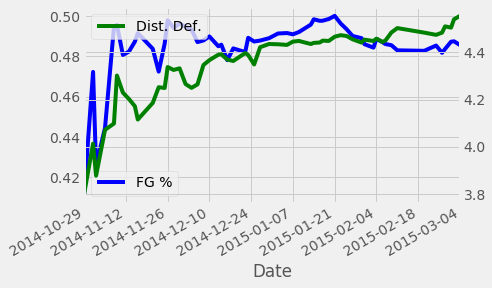

In [31]:
%matplotlib inline

plt.style.use("fivethirtyeight")

fig, ax = plt.subplots()

df_shots_cumulative.FG_Percentage.plot(ax = ax,\
                                       color = "b",\
                                     label = "FG %")
ax.legend(loc = 0)
ax1 = ax.twinx()
df_def_cumulative.plot(ax=ax1, color = "g", label = "Dist. Def.")

ax1.legend(loc= 0)